<h1><center>Financial Applications of Time Series</center></h1>
<center> David Tran, Frank Sclafani, Matthew Przybyla, and Brandon Hill</center>
<center> MSDS 7333 - Quantifying the World - Case Study 4 (Unit 4)</center>
<center> June 5 2018</center>

# Abstract

The purpose of this paper is to apply time series analysis techniques to financial applications. In this paper we demonstrate the use of Python libraries, such as NumPy, pandas, and matplotlib, to handle financial time series data. One of the challenges that arise when working with financial data is known as the data-alignment problem. This data-alignment problem occurs when two related time series may have indexes that do not line up perfectly (or when two DataFrame objects might have columns or row labels that do not match). 

One type of analysis that we will demonstrate to solve this issue is to utilize the Python library, pandas, to automatically align data in arithmetic operations. We will analyze a simplified cross-sectional momentum portfolio and demonstrate how to set up a strategy backtesting function that computes a portfolio for a particular lookback and holding period to return the overall Sharpe ratio that can be used to predict prices for a portfolio of financial and technology stocks.

# Introduction

Financial instituions or FIs, such as banks and traders, heavily rely on financial modeling and forecasting in order to create a portfolio or risk recommendations to their clients. The performance and research by financial institutions are limited by their headcount and resources. The data science fields have different models and algorithms that can handle large amounts of financial data and analyze it in order for trend and predictive analysis. For our analysis, we have chosen the Signal Frontier Analysis method. 

The method consists of a simplified cross-sectional momentum portfolio and shows how someone would explore a grid of model parameterizations. The financial stock data came from the Investors Exchange API. The stocks that were chosen are: Amazon (AMZN), Walmart (WMT), Target (TGT), Best Buy (BBY), and Costco (COST). All of these companies are in the retail industry, such as consumer goods, retail, or electronics. 

The date range of the data set spans 5 years between June 4, 2013 to June 1, 2018. The analysis will be based off of its daily closing price. The analysis will allow to understand and create insight of different trends, correlations, and findings. All of the findings will be explained in the Results down below. 

# Background

The stock market volumes dataset collected via the Investors Exchange API contains 1,304 observations and 6 variables. There is no missing data within any of the variables across all observations. Our objective is to analyze the historical daily adjusted closing stock prices for 5 major retail companies for the 5-year span between June 4, 2013, and June 1, 2018. A full list of variable descriptions, including the DateTime variable in which the observation was captured and the data is indexed by, can be found in Table 1:

|    Variable   |                                         Description                                         |    Type    |
|:-------------:|:-------------------------------------------------------------------------------------------:|:----------:|
| DatetimeIndex | Date observation was collected. (Index of data)                                             |  Ordinal   |
| AMZN          | Amazon.com, Inc. closing price with dividends.             | Continuous |
| WMT           | Walmart Inc. closing price with dividends.                | Continuous |
| TGT           | Target Corporation closing price with dividends.          | Continuous |
| BBY           | Best Buy Co., Inc. closing price with dividends.          | Continuous |
| COST          | Costco Wholesale Corporation closing price with dividends. | Continuous |

# Methods - Signal Frontier Analysis

#### Data Loading & Preparation

In [1]:
# This cell just tells the notebook to set the width of the cells in relation to the screen width
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
print('Loading globals ...')

import datetime
import pandas as pd
start_dt=datetime.datetime(2013,1,1)
end_dt=datetime.datetime(2018,7,1)
from pandas_datareader import data as web

from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

import warnings
warnings.filterwarnings('ignore')

print('Globals Loaded')

Loading globals ...
Globals Loaded


Here we specify the use of The Investors Exchange API for our historical stock prices:

In [3]:
print('')
print('Loading Data')

stock='AMZN'
px=pd.DataFrame({'AMZN':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['WMT','TGT', 'BBY','COST']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

print('File Has Been Loaded')


Loading Data
5y
5y
5y
5y
5y
File Has Been Loaded


Next we specify that the series frequency is generated on business days: 

In [4]:
px = px.asfreq('B').fillna(method='pad')

Example records listed below:

In [5]:
px

,AMZN,WMT,TGT,BBY,COST
date,,,,,
2013-06-05,267.17,65.7025,59.6044,23.2574,96.0604
2013-06-06,267.83,66.0343,59.6809,23.7639,97.7498
2013-06-07,276.87,66.6455,59.7658,23.6344,97.3011
2013-06-10,281.07,66.1390,59.3581,24.2218,97.0635
2013-06-11,274.78,65.7025,59.4600,24.0922,96.8083
2013-06-12,271.67,65.3445,58.9759,23.2197,96.2628
...,...,...,...,...,...
2018-05-28,1610.15,82.4600,71.2100,68.4500,198.3600
2018-05-29,1612.87,82.4000,71.7000,68.1800,196.7400


In [6]:
plt.close('all')

#### Cumulative Returns:

In [7]:
import seaborn as sns
sns.set(style="ticks")

In the graph below, all five stocks are compared over the five year period. The most noticeable trend is from AMZN, which is nearly twice the level at the current time as any other stock. Interestingly, the second highest stock, BBY, increases as AMZN does, almost mimicking/paralleling its behavior. This event could be indicative of mutual characteristics between the two companies. While COST, WMT, and TGT see overall low returns, relatively, AMZN, however, does have a precipitous drop at the year 2016. Research suggests this activity could be due to an increase in investment from digital content, such as AWS and Echo. (See: http://money.cnn.com/2016/10/27/technology/amazon-earnings/index.html )

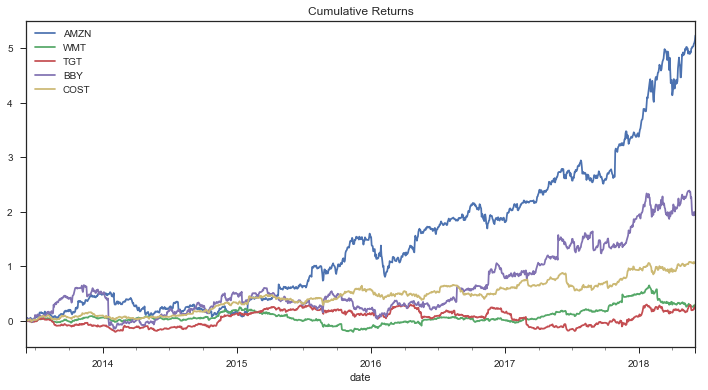

In [9]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.title('Cumulative Returns')
plt.show()

We use the following function which computes momentum over a certain lookback period, then ranks in descending order and standardizes:

In [14]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

Using the momentum function, we set up strategy backtesting function that computes a portfolio for a particular lookback and holding period (days between trading). This provides us with the overall Sharpe ratio:

In [15]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)


For our prices and parameter combination, this function returns a scalar value:

In [16]:
strat_sr(px, 70, 30)

0.06750213420665724

In [17]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

# Results

Below we use illustrate the results of the momentum strategy using a heatmap to compare various lookback and holding periods.

In [18]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

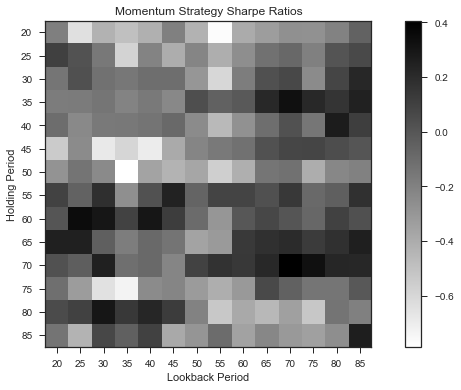

In [19]:
heatmap(ddf)
plt.title('Momentum Strategy Sharpe Ratios')
plt.show()

Based off the illustrated results, it appears that there are higher Sharpe ratios for lookback periods greater than 50 days. This is desired as higher Sharpe ratios validates that the investment produces a larger return against free return treasury bill. Futhermore, holding periods between 25 and 75 days tend to perform better combined with the lookback period greater than 50 days.

For those investments with lookback periods less than 50 days, you should stick to holding periods of 25, 55-65, and 80 days as they fare better. 

Overall sticking to holding periods of 55 to 75 days provides consistent desired returns without having to consider lookback periods. 

# Future Work / Discussion / Conclusions

For practical applications of this analysis, we will be wise to not blindly accept market strategy results. In our analysis on the dataset in this study, we naturally settled on results that provided the highest return. Also, our strategy assumes that historical success is an indicator of how the stock will perform in the future. As we all know, there, of course, no way of knowing for sure how the market will perform. During our analysis, we used a weight constraint at minimum variance. Our system rebalances the portfolio data once per business day. Future analysis could explore the possibility of longer time periods, such as daily or weekly rebalancing and compare that to see if that provides an additional advantage. Finally, other methods, other than the Sharp Ratio that we chose for this analysis, should be evaluated and compare the constraints using regression comparison analysis.